<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/07_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning
##신경망(Neural Network), 개념, 아키텍처

###Review -XOR 
* 한개의 선형회귀와 분류로 구성된 것은 XOR 을 구성 할 수 없었다.
* 독립적으로 움직이는 Logistic Regression의 출력과 입력을 연결시켜 작동 시켰다.
* 이것은 우리 인간의 신경망과 같았다.

###신경 세포인 뉴련 동작원리를 머신러닝에 적용하기 위해서는 

1. 입력 신호와 가중치를 적당한 바이어스를 더한후(Linear Regression)
2. 그 값을 활성화 함수(ex. sigmoid) 입력으로 전달(Classification)해서 sigmoid함수 임계점을 0.5를 넣으면 1을, 그렇지 않으면 0을 다음 뉴런으로 전달해주는 

- *Multi-Variable Logistic Regression 시스템 구축*
 

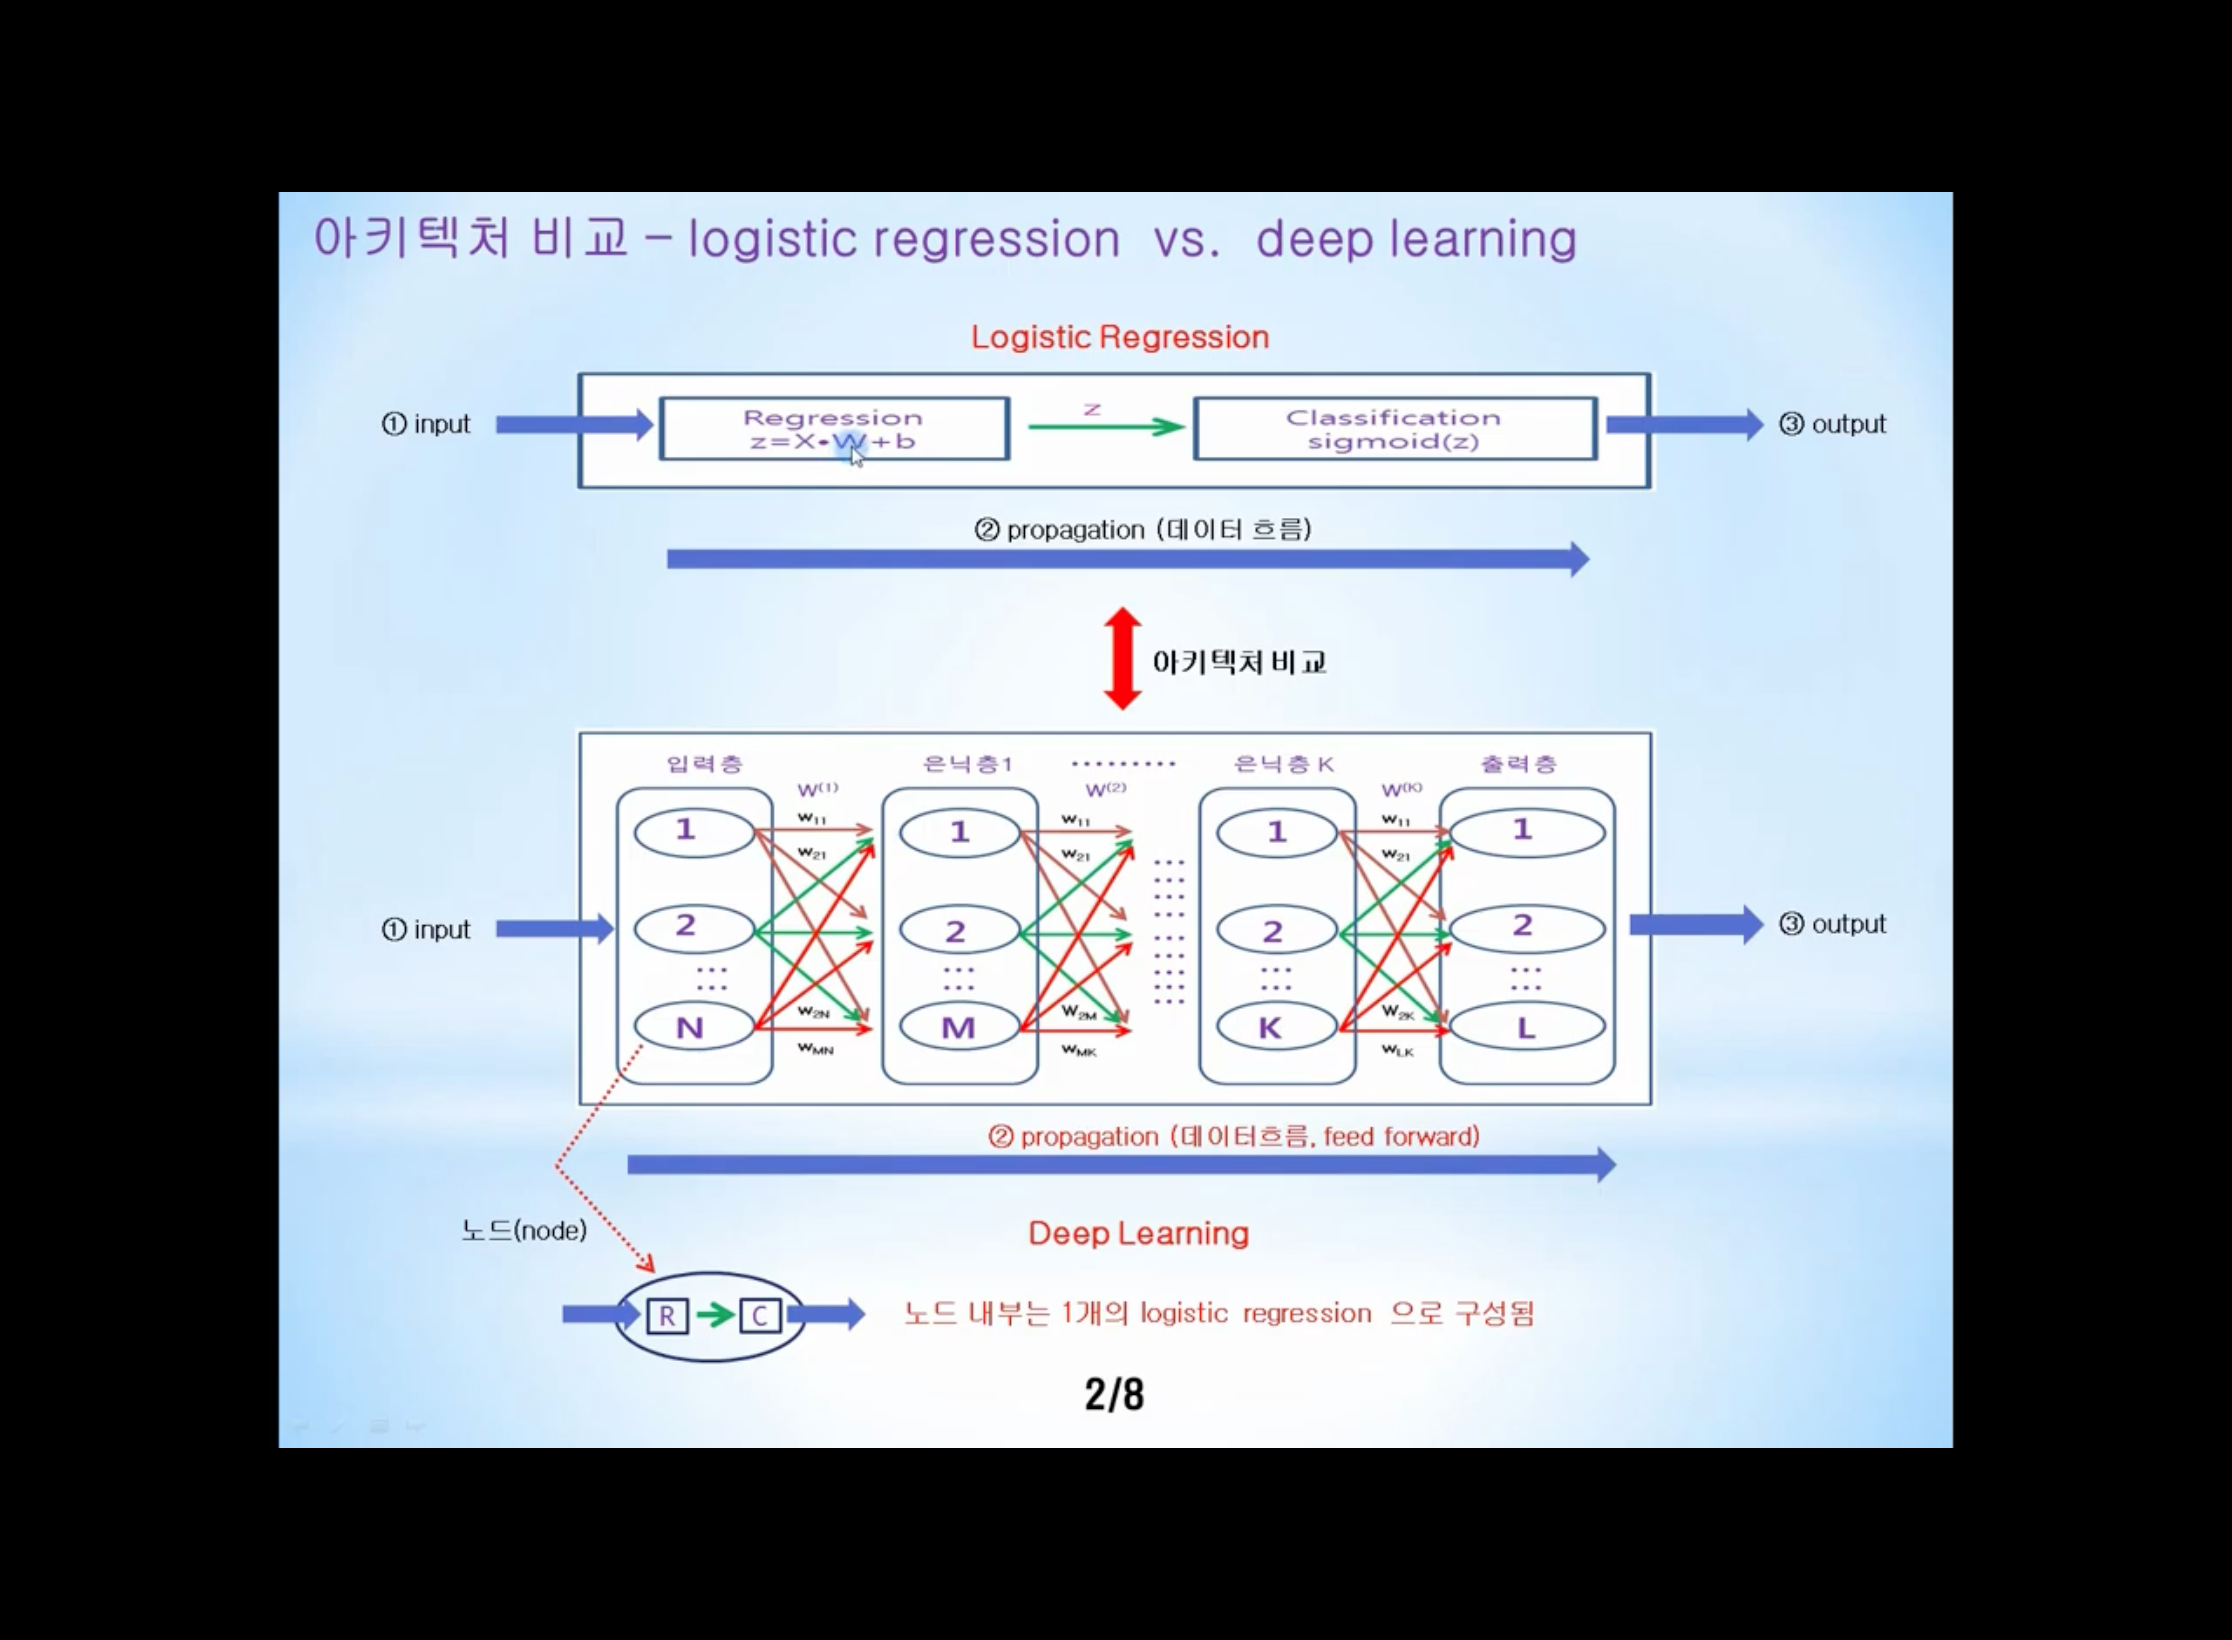

#계층간 표기법
- 계층간 가중치 표기법
$$ W^{(2)}_{21} $$

- 바이어스 표기법
$$ b^{(2)}_{1} $$

- 노드의 선형 회귀 계산 값 표기법
$$ z^{(2)}_{2} =W^{(2)}_{21} x_1+ W^{(2)}_{22}x_2+b^{(2)}_{2} $$

- 노드의 출력 표기법 
$$ a^{(2)}_{2}=sigmoid(z^{(2)}_{2}) $$



#피드 포워드(feed forword)

- 입력 층(input layer)으로 데이터가 입력되고, 1개 이상으로 구성되는 은닉 층(hidden layer)을 거쳐 마지막에 출력 층(out layer)으로 출력 값을 내보내는 과정

#06에서 만들다 못 만든 XOR함수의 해결

입력 행렬의 값을 reshape 해주는 것과 히든 레이어층을 6개로 늘리는 것으로 해결
입력데이터의 형식의 중요성과 히든레이어 층의 갯수의 중요성을 느꼇다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def numerical_derivative(f,x):
  delta=1e-6
  grads=np.zeros_like(x)
  it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])

  while not it.finished:
    idx=it.multi_index
    tmp_value=x[idx]
    x[idx]=float(tmp_value)+delta
    fx1=f(x)

    x[idx]=tmp_value-delta
    fx2=f(x)

    grads[idx]=(fx1-fx2)/(2*delta)

    x[idx]=tmp_value
    it.iternext()
  return grads

def sigmoid(x):
  return 1/(1+np.exp(-x))

class find_xor:
  def __init__(self, x,t):
    self.params={}
    self.params['W1']=np.random.rand(2,6)
    self.params['b1']=np.random.rand(6)
    self.params['W2']=np.random.rand(6,1)
    self.params['b2']=np.random.rand(1)
    self.x_data=x.reshape(4,2)
    self.t_data=t.reshape(4,1)

  def predict(self,x):
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    if y>=0.5:
      result=1
    else:
      result=0
    return y ,result

  def cee(self,x,t):
    delta1=1e-7
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    return -np.sum(t*np.log(y+delta1)+(1-t)*np.log(1-y+delta1))
    
    
  def error_value(self,x,t):
    delta=1e-7
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))
  
  def train(self):
    training_rate=1e-2

    f=lambda x: self.cee(self.x_data,self.t_data)

    for step in range(10001):
      for i in ['W1','b1','W2','b2']:
        self.params[i] -= training_rate * numerical_derivative(f,self.params[i])

      if step%2000==0:
        print('\nstep:',step,'error value:',self.error_value(self.x_data,self.t_data),'\n')

In [24]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]])
t_xor=np.array([0,1,1,0])

In [25]:
xor_class=find_xor(x_data,t_xor)
xor_class.train()

print('0,0:',xor_class.predict(np.array([0,0])))
print('1,0:',xor_class.predict(np.array([1,0])))
print('0,1:',xor_class.predict(np.array([0,1])))
print('1,1:',xor_class.predict(np.array([1,1])))


step: 0 error value: 5.580626327191305 


step: 2000 error value: 2.71518021586993 


step: 4000 error value: 2.5193365179976928 


step: 6000 error value: 2.0485302947874096 


step: 8000 error value: 1.290406662776305 


step: 10000 error value: 0.5593610251551535 

0,0: (array([0.09722155]), 0)
1,0: (array([0.870287]), 1)
0,1: (array([0.87989632]), 1)
1,1: (array([0.1732062]), 0)
